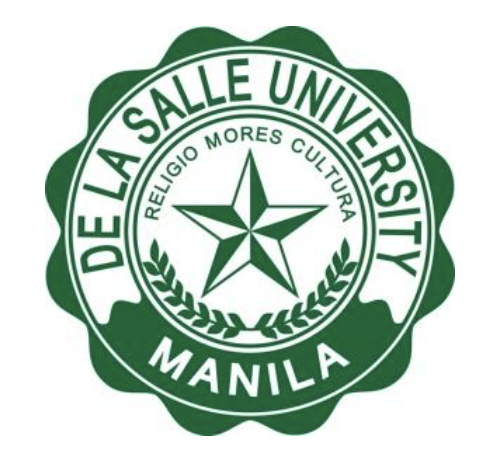

De La Salle University - Manila <br>

Term 2, A.Y. 2023 - 2024 <br>

<br> In partial fulfillment of the course <br>
CSMODEL - S12

<br> **Project Phase 2** <br>
**Case Study**

<br>**Submitted to:** <br>

Mr. Gabriel Avelino R. Sampedro

<br>**Submitted by:**

Nathaniel Luis V. Alfaro<br>
Mark Kevin G. Ang <br>
Louis Ezechiel L. Cada<br>
Colin Ice R. King-eo<br>
Jose Miguel L. Pilea

<br>**Submitted on:**
April 3, 2024

# I. Dataset Description (Phase 1)

### A. Brief Description of Dataset

<p align="justify"> For this project we have decided to choose Best Selling Mobile Phones by Aryan Shanker Saxena. The dataset contains raw data of the best-selling smartphones as of February 2024. We would like to note that this data is not pre-processed and was scraped using beautifulSoup. Data Cleaning and Exploratory Data Analysis will be used later as required in the first phase of this project. </p>

### B. Collection Process and Implications



<p align="justify"> The collection process involves gathering data from various sources or reports that provide information about the sales or shipments of mobile phone models over the years. This data has been compiled from industry reports, company announcements, or market research studies, as indicated by the references in square brackets. Moreover, the data includes variables such as the manufacturer, model, form factor, smartphone classification, year of release, and the number of units sold in millions, which will be futher discussed in the analysis. </p>

<p align="justify"> The dataset includes a diverse range of mobile phone models from different manufacturers. The inclusion criteria covers both feature phones and smartphones, with a focus on units sold in millions. In addition, the dataset spans multiple years, providing a temporal perspective on the popularity and sales of different mobile phone models. </p>

<p align="justify"> The implications based on the data collection mainly concerns the reliability of the dataset. This hinges on the credibility of the referenced sources. Since there are no external sources listed in the datasend collected, if the sources are reputable and is consistently updated, the dataset is more likely to be reliable. On the other hand, reliance on outdated or unreliable sources could compromise the accuracy of the conclusions drawn. </p>

<p align="justify"> The dataset shows the progressive nature of the mobile phone market across various years, focusing on the evolution of device popularity. Since the dataset is updated until February 2024, it relects the latest models or current market trends. Therefore, any conclusions drawn from the dataset are up to date. Based on the data, the classification of phones into "smartphones" or "non-smartphones" may also oversimplify the analysis, given the evolving definition and features of smartphones over time. Some older phones categorized as non-smartphones might have possessed features now considered standard in smartphones. Additionally, the presence of incomplete information, such as missing values for the number of units sold for certain models, could impact the overall completeness of the analysis and limit the ability to draw robust conclusions for those specific entries. </p>



### C. Structure of Dataset

<p align="justify"> Each column represents a mobile phone model from various manufacturers. It includes information such as the manufacturer, model name, form factor (e.g., bar, touchscreen, flip phone), whether it's a smartphone, the year of release, and the number of units sold (graph in million units).

On the other hand, the rows represent specific variables or attributes of the mobile phones, which include the categories of the rows mentioned above:
* **Manufacturer:** The company that produced the phone.
* **Model:** The name or identifier of the phone model.
* **Form factor:** The physical design of the phone (e.g., bar, touchscreen, flip phone).
* **Smartphone:** Indicates whether the phone is a smartphone (Yes/No).
* **Year:** The year the phone was released.
* **Graph (million units):** The number of units sold, given in million units.

As for the observations found in the dataset, there are a total of 116 entries included. Along with these, each entry are classified into six variables mentioned earlier which are the Manufacturer, Model, Form factor, Smartphone?, Year, and Graph (million units). </p>



### D. Variables in the Dataset


<p align="justify"> As explained in Part C, the variables provide crucial information about each mobile phone model, allowing for analysis, such as trends in mobile phone technology, market share of different manufacturers, or the evolution of form factors over time. Each variable contributes to a comprehensive understanding of the dataset, and their purposes are clear to the reader within the context of the mobile phone industry study. </p>

# II. Data Cleaning (Phase 1)


<p align="justify"> In order to guarantee that the dataset is correct, consistent, and prepared for analysis, data cleaning is an essential stage in the data analysis process. By addressing a number of issues with the dataset that could affect the accuracy and dependability of the research, the significance of data cleaning can be demonstrated. The steps took and the reasons for them are listed below: </p>

### A. Importing Libraries and Reading the Data





In [ ]:
import pandas as pd
import re

data = pd.read_csv('top_selling_mobile_phones.csv')

print(data.head())

  Manufacturer                         Model  Form factor Smartphone?  Year  \
0        Nokia                          1100          Bar          No  2003   
1        Nokia                          1110          Bar          No  2005   
2        Apple    iPhone 6 and iPhone 6 Plus  Touchscreen         Yes  2014   
3        Nokia                   105 series,          Bar          No  2013   
4        Apple  iPhone 6S and iPhone 6S Plus  Touchscreen         Yes  2015   

  Graph (million units)  Graph (million units).1  
0          250[4][1][5]                      NaN  
1        247.5[4][1][6]                      NaN  
2              222.4[7]                      NaN  
3                200[8]                      NaN  
4  174.1[9][10][11][12]                      NaN  


<p align="justify">  In the provided code, pandas is a Python library used for data manipulation and analysis, and it is imported with the alias pd. The re module, which deals with regular expressions, is also imported as it provides support for regular expressions, which are powerful tools for pattern matching and manipulation of strings. </p>

<p align="justify"> The primary purpose of the code is to read a CSV file named 'top_selling_mobile_phones.csv' using the pd.read_csv() function, resulting in a DataFrame named data. DataFrames are two-dimensional data structures commonly used in pandas. The print(data.head()) statement is employed to display the first few rows of the DataFrame, offering a quick overview of the loaded data. </p>

### B. Deleting Empty Columns


In [ ]:
# Dropping the 'Graph (million units).1' column
data = data.drop(columns=['Graph (million units).1'])

print(data.head())

  Manufacturer                         Model  Form factor Smartphone?  Year  \
0        Nokia                          1100          Bar          No  2003   
1        Nokia                          1110          Bar          No  2005   
2        Apple    iPhone 6 and iPhone 6 Plus  Touchscreen         Yes  2014   
3        Nokia                   105 series,          Bar          No  2013   
4        Apple  iPhone 6S and iPhone 6S Plus  Touchscreen         Yes  2015   

  Graph (million units)  
0          250[4][1][5]  
1        247.5[4][1][6]  
2              222.4[7]  
3                200[8]  
4  174.1[9][10][11][12]  


<p align="justify"> The column 'Graph (million units).1' was dropped as it did not contain any data in its rows. It is important to eliminate irrelevant or redundant information to streamline the dataset. </p>

### C. Converting The Data In To Their Proper Data Types

In the data cleaning process,  data types transformations were applied to enhance the consistency and interpretability of the dataset.

In [ ]:
# Convert numbers in 'Model' by the Manufacturer Nokia to strings
data.loc[data['Manufacturer'] == 'Nokia', 'Model'] = data.loc[data['Manufacturer'] == 'Nokia', 'Model'].astype(str)

#  Convert 'Year' to the correct datatype
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Convert 'No' and 'Yes' in the 'Smartphone?' column to 0 and 1
data['Smartphone?'] = data['Smartphone?'].map({'No': 0, 'Yes': 1})

print(data.head())

  Manufacturer                         Model  Form factor  Smartphone?  Year  \
0        Nokia                          1100          Bar            0  2003   
1        Nokia                          1110          Bar            0  2005   
2        Apple    iPhone 6 and iPhone 6 Plus  Touchscreen            1  2014   
3        Nokia                   105 series,          Bar            0  2013   
4        Apple  iPhone 6S and iPhone 6S Plus  Touchscreen            1  2015   

  Graph (million units)  
0          250[4][1][5]  
1        247.5[4][1][6]  
2              222.4[7]  
3                200[8]  
4  174.1[9][10][11][12]  


<p align="justify"> The 'Model' numbers for Nokia were initially turned into strings to provide consistency in data types throughout the column. This phase was especially crucial to avoid any problems arising from mixed data types and to ensure that mobile phone models were represented clearly. </p>

<p align="justify"> Second, the 'Year' column is changed to a numeric datatype, which is the appropriate datatype. Performing this step guarantees that the 'Year' column has numerical values and may be suitably utilized for analysis or display. </p>


<p align="justify"> And lastly, the "Smartphone?' column, which indicates if a phone is a smartphone or not. To standardize the data, the Yes and No values were changed to binary 0 and 1. </p>


### D. Properly Representing Data




<p align="justify"> The following code involves eliminating the contained values inside the brackets from the 'Graph (million units)' column because they are not necessary for the data analysis. This procedure removes unnecessary symbols that could otherwise compromise dataset consistency ensuring a consistent numerical representation. A more uniform display of numerical data is achieved by using a lambda function to apply a regular expression and eliminate these components. </p>

<p align="justify"> The code then standardizes the unit of measurement in the 'Graph (million units)' column after removing the brackets. The dataset has been normalized to a million-unit scale by multiplying every result by 1000000, for easier interpretation. This conversion improves the numerical data's clarity, making the dataset more logical and understandable. </p>


In [ ]:
# Remove brackets and numbers inside brackets in 'Graph (million units)'
data['Graph (million units)'] = data['Graph (million units)'].apply(lambda x: re.sub(r'\[.*?\]', '', str(x)))

# Multiply all values in 'Graph (million units)' by 1000000
data['Graph (million units)'] = pd.to_numeric(data['Graph (million units)'], errors='coerce') * 1000000

# Remove duplicate data
data = data.drop_duplicates()


# Display the cleaned DataFrame
print(data.head())

  Manufacturer                         Model  Form factor  Smartphone?  Year  \
0        Nokia                          1100          Bar            0  2003   
1        Nokia                          1110          Bar            0  2005   
2        Apple    iPhone 6 and iPhone 6 Plus  Touchscreen            1  2014   
3        Nokia                   105 series,          Bar            0  2013   
4        Apple  iPhone 6S and iPhone 6S Plus  Touchscreen            1  2015   

   Graph (million units)  
0            250000000.0  
1            247500000.0  
2            222400000.0  
3            200000000.0  
4            174100000.0  


The dataset is now ready for data analysis after undergoing these cleaning procedures. The variables are encoded correctly, data types are accurate, and redundant or missing information has been resolved. The cleaned dataset is now prepared for analysis using data mining techniques, exploration, and visualization.


# III. Exploratory Data Analysis (Phase 1)

<p align="justify"> Exploratory Data Analysis (EDA) is a crucial step in understanding and extracting meaningful insights from a dataset. In this context, we pose four concise questions to guide our exploration as we generate the nummerical represenations as well as their corresponding graphs to further answer the questions: </p>

### A. Exploratory Data Analysis (EDA) questions:

<p align="justify"> 1. What is the distribution of smartphone vs. non-smartphone models? <br>
2. How does the distribution of units sold vary over the years? <br>
3. Is there a correlation between the year of release and the number of units sold? <br>
4. How are the form factors distributed among smartphones? </p>


###B. Import Necessary Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<p align="justify"> This code initiates the use of two powerful Python visualization libraries: Matplotlib and Seaborn. Matplotlib is a versatile plotting library, while Seaborn is built on top of Matplotlib, offering enhanced aesthetics and statistical functionalities for data visualization. The combination of these two libraries enables the creation of informative and visually appealing plots and charts in Python. </p>

###C. Generate the Nummerical Summaries and their Visualizations

*  **EDA Question 1: What is the distribution of smartphone vs. non-smartphone models?**

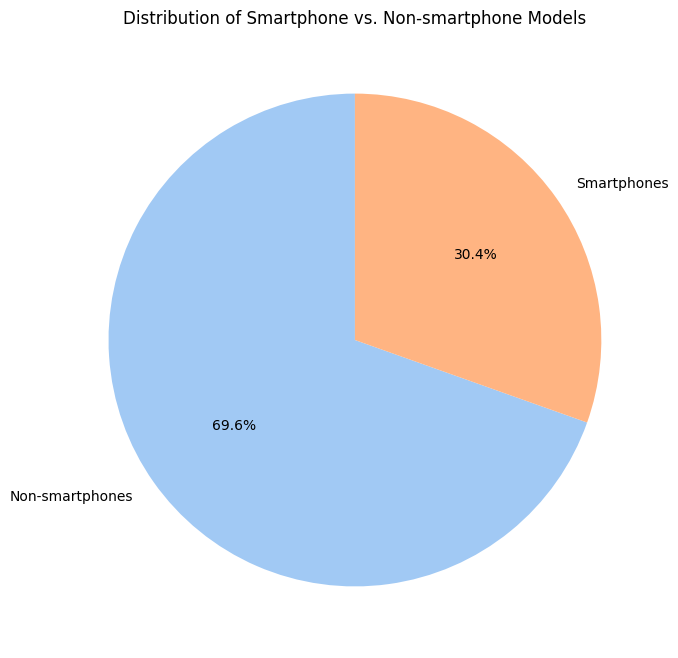

In [ ]:
# EDA Question 1

# Numerical Summaries
smartphone_distribution = data['Smartphone?'].value_counts()
percentage_distribution = smartphone_distribution / smartphone_distribution.sum() * 100

# Visualization
plt.figure(figsize=(8, 8))
plt.pie(percentage_distribution, labels=['Non-smartphones', 'Smartphones'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Smartphone vs. Non-smartphone Models')
plt.show()

**Numerical Summaries:**
* smartphone_distribution: Counts the number of smartphone and non-smartphone models.
* percentage_distribution: Calculates the percentage distribution of smartphone and non-smartphone models.

**Visualization:**
* A pie chart is created to visually represent the distribution, showing the percentage of non-smartphones and smartphones.

* **EDA Question 2: How does the distribution of units sold vary over the years?**

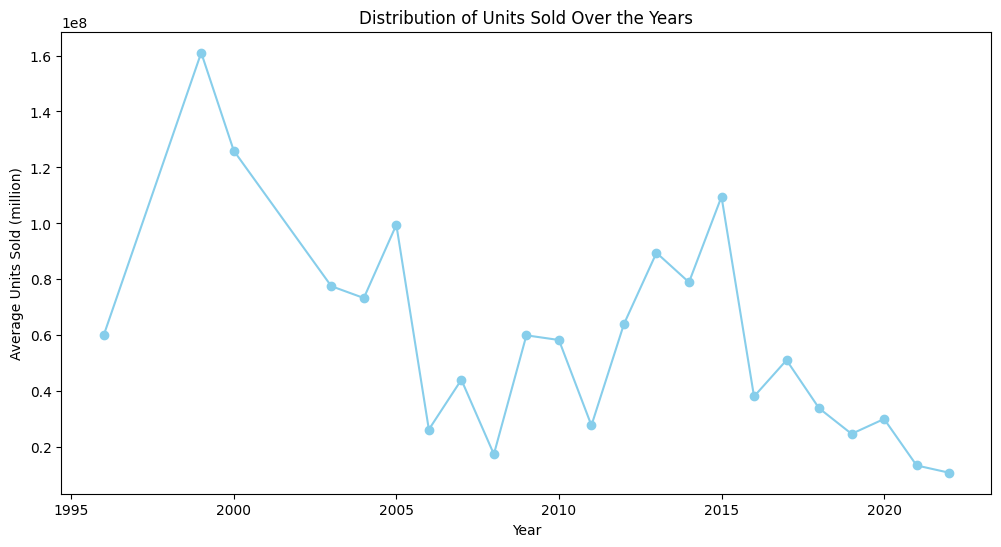

In [ ]:
# EDA Question 2
# Numerical Summaries
units_sold_by_year = data.groupby('Year')['Graph (million units)'].mean()

# Visualization
plt.figure(figsize=(12, 6))
units_sold_by_year.plot(kind='line', marker='o', color='skyblue')
plt.title('Distribution of Units Sold Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Units Sold (million)')
plt.show()

**Numerical Summaries:**
* units_sold_by_year: Calculates the average units sold for each year.

**Visualization:**
* A line plot is created to illustrate the distribution of average units sold over the years.

* **EDA Question 3: Is there a correlation between the year of release and the number of units sold?**

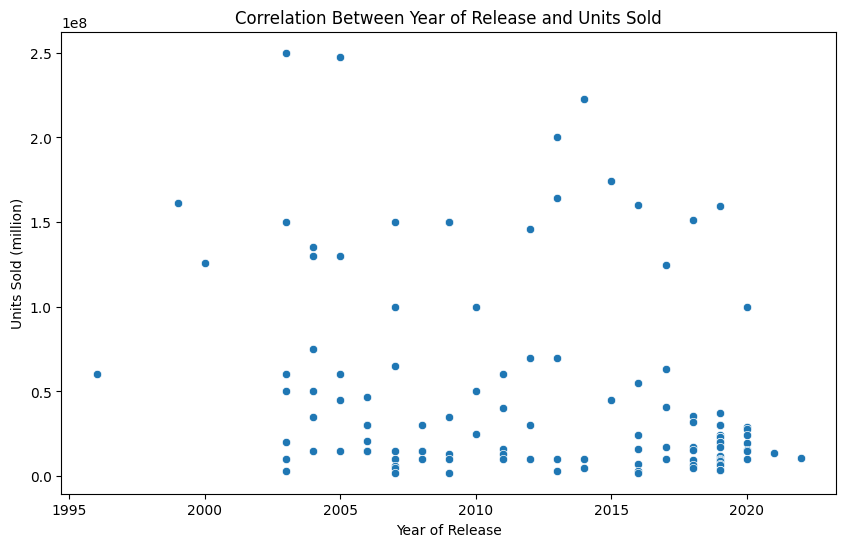

In [ ]:
# EDA Question 3

# Numerical Summaries
correlation_year_units_sold = data['Year'].corr(data['Graph (million units)'])

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Graph (million units)', data=data)
plt.title('Correlation Between Year of Release and Units Sold')
plt.xlabel('Year of Release')
plt.ylabel('Units Sold (million)')
plt.show()

**Numerical Summaries:**
* correlation_year_units_sold: Computes the correlation coefficient between the year of release and the number of units sold.

**Visualization:**
* A scatter plot is generated to display the relationship between the year of release and the number of units sold.

* **EDA Question 4: How are the form factors distributed among smartphones?**

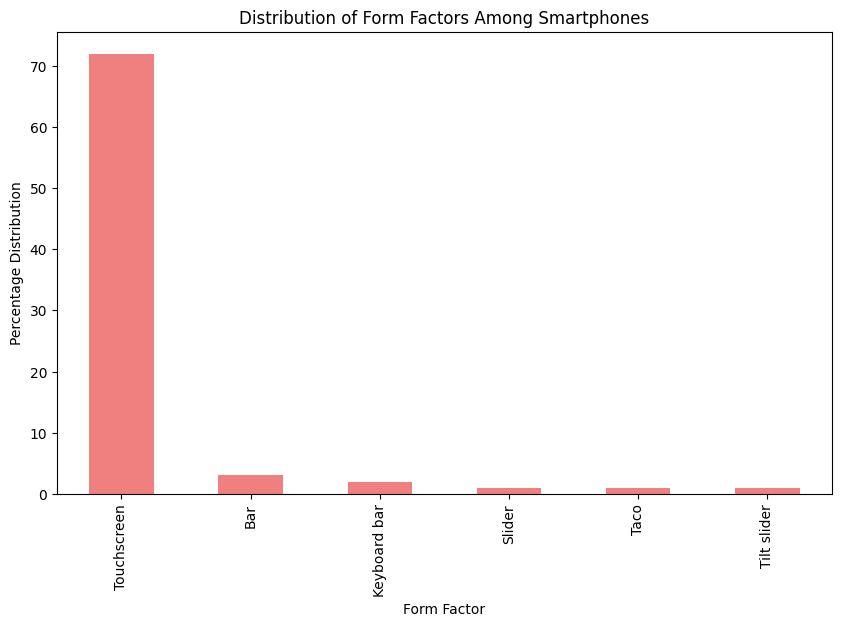

In [ ]:
# EDA Question 4
# Numerical Summaries

form_factor_distribution = data[data['Smartphone?'] == 1]['Form factor'].astype(str).value_counts()
percentage_form_factor_distribution = form_factor_distribution / form_factor_distribution.sum() * 100

# Visualization
plt.figure(figsize=(10, 6))
form_factor_distribution.plot(kind='bar', color='lightcoral')
plt.title('Distribution of Form Factors Among Smartphones')
plt.xlabel('Form Factor')
plt.ylabel('Percentage Distribution')
plt.show()

**Numerical Summaries:**
* form_factor_distribution: Counts the occurrences of each form factor among smartphones.
* percentage_form_factor_distribution: Calculates the percentage distribution of form factors among smartphones.

**Visualization:**
* A bar chart is created to visually represent the distribution of form factors among smartphones.

# IV. Research Question (Phase 1)

<p align="justify">In data-driven decision-making, understanding the process of releasing a new product, particularly its timing, would help businesses decide how they anticipate for future changes in the market and how they can utilize when such changes happen to prepare for the release of their upcoming product/s.</p>

<p align="justify">Our exploratory data analysis has led us to a key research question:</p>

<p align="justify"> "Is there a strong correlation between the market share of a smartphone brand and its year of release?" </p>

<p align="justify">This investigation aims to unveil patterns and associations that can deepen targeted marketing strategies, ultimately enhancing customer satisfaction and optimizing product offerings.</p>

<p align="justify">Based on our Exploratory Data Analysis (EDA), it turns out that there is only a weak correlation between the market share of a smartphone/non-smartphone product and its year of release since other factors play a larger role in determining the market share, particularly the latest technology trends, techonology specifications, customer preferences, and income of individuals who purchase the products mentioned.Understanding these connections lets businesses fine-tune their offerings, ensuring they match the varied tastes and needs of their diverse customer base.</p>

# V. Data Modelling






<p align="justify">Data modeling is a critical process in data management that creates structured representations of data, including entities, attributes, and relationships. It aims to organize data effectively for storage, retrieval, analysis, and decision-making, ensuring data integrity and supporting efficient system design and software development.</p>

<p align="justify">Based on the group's research question and the outcome of our exploratory data analysis (EDA) for the first phase of our project,</p>

**"Is there a strong correlation between the market share of a smartphone brand and its year of release?"**

<p align="justify">The research question indicates a weak correlation between the market share of a smartphone brand and its year of release. Upon research and based on the learning material given to our group, we have concluded the appropriate data modeling technique would be a Graph Data Modelling, specifically Clustering and Link Prediction.</p>

<p align="justify">Through clustering, distinct groups of smartphone models based on market share trends and release years can be identified, providing a valuable insight into market segmentation and enabling tailored strategies for different customer audiences. This analysis not only helps in understanding market trends and competitive landscapes but also assists in predicting future market patterns, allowing businesses to stay updated in their decision-making processes.</p>

<p align="justify">Additionally, link prediction, particularly using algorithms like preferential attachment, was utilized to forecast potential correlations between smartphone models. This approach can be used in finding hidden relationships between brands, offering valuable market insights and opportunities for strategic collaborations. By integrating clustering and link prediction techniques, the group's research enhances data-driven decision-making in the smartphone industry, optimizing marketing strategies, and anticipating market changes.</p>



### A. Clustering

<p align="justify">The provided code block imports necessary libraries and loads pre-processed data from Phase 1. Specifically, networkx as nx is imported for the creation and manipulation of complex networks, KMeans from sklearn.cluster is used for K-means clustering to partition observations into clusters, and accuracy_score and silhouette_score from sklearn.metrics are used to compute the accuracy classification score and silhouette score, respectively. Additionally, import matplotlib.pyplot as plt has been added to ensure that the plotting functions from matplotlib are available for use.</p>

In [ ]:
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load pre-processed data from Phase 1
df = pd.read_csv('cleaned_data.csv')

<p align="justify">The line df = pd.read_csv('cleaned_data.csv') reads the pre-processed data from Phase 1 stored in a CSV file named 'cleaned_data.csv' and loads it into a pandas DataFrame df. This DataFrame is then used to select relevant features for clustering, specifically the 'Market Share' and 'Year' columns.</p>

In [ ]:
# Select relevant features for clustering
X = df[['Graph (million units)', 'Year']]

# Initialize K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)

# Fit K-means model
kmeans.fit(X)

# Add cluster labels to the dataset
df['Cluster'] = kmeans.labels_

<p align="justify">A K-means clustering model is initialized with two clusters and is fitted to the selected features. The cluster labels are added to the DataFrame, and a scatter plot is generated to visualize the clusters based on 'Market Share' and 'Year of Release'.</p>

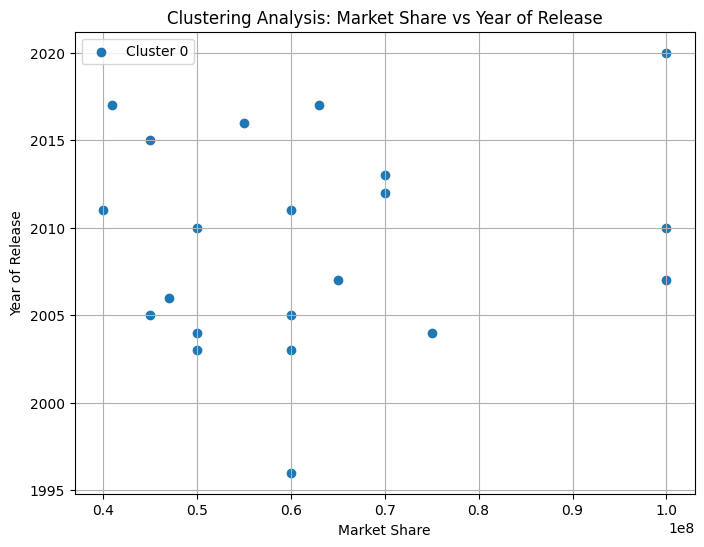

In [ ]:
# Visualize clusters using scatter plot
plt.figure(figsize=(8, 6))

# Plot each data point with a color corresponding to its cluster label
for cluster_label in range(1):  # Assuming 1 cluster based on your KMeans setup
    cluster_data = df[df['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Graph (million units)'], cluster_data['Year'], label=f'Cluster {cluster_label}')

# Add labels and title
plt.xlabel('Market Share')
plt.ylabel('Year of Release')
plt.title('Clustering Analysis: Market Share vs Year of Release')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

<p align="justify"> The scatter plot visualization represents the clustering analysis based on the features 'Market Share' and 'Year of Release.' The data points are grouped into clusters, with each cluster representing a distinct segment of the dataset. The separation between clusters indicates how effectively the clustering algorithm, in this case, KMeans with 1 cluster, has categorized the data. The dense clusters suggest that data points within each group share similar values for both 'Market Share' and 'Year of Release,' although since the graph does not represent an increasing or decreasing correlation, it may be inferred that there is a very weak between the two variables. Moreover, outliers also stand out as data points significantly distant from others in their cluster, potentially indicating unique cases within the dataset.</p>

<p align="justify">The code then calculates the silhouette score using sklearn.metrics.silhouette_score to measure the quality of the clusters formed by the K-means algorithm. The silhouette score, ranging from -1 to 1, indicates how well each data point fits into its assigned cluster compared to other clusters. A higher score suggests well-defined clusters, while a score around 0 indicates overlapping clusters. The calculated score is then printed to evaluate the clustering effectiveness.</p>

In [ ]:
# Calculate silhouette score for clustering
silhouette_score_value = silhouette_score(X, kmeans.labels_)

# Print the silhouette score
print(f"Silhouette Score: {silhouette_score_value}")

Silhouette Score: 0.678205462502012


<p align="justify">In the provided code, the silhouette score was calculated using the silhouette_score function from the sklearn.metrics module. The calculated silhouette score is 0.678, which is relatively close to 1. This high score suggests that the clusters formed by the K-means algorithm are well-separated and the data points within each cluster are relatively homogeneous.</p>

<p align="justify">A silhouette score of 0.678 indicates a strong and well-defined structure in the clusters. This suggests that the clustering process has been effective in grouping similar smartphones together into distinct clusters based on their 'Market Share' and 'Year of Release' features. Thus, the high silhouette score confirms that the clustering has successfully identified and separated the smartphones into clusters where the smartphones within each cluster are more similar to each other than to those in other clusters.</p>

### B. Link Prediction

<p align="justify">The following code constructs an undirected graph representing smartphone models and their relationships based on market share. It adds nodes for each unique smartphone model and edges between models where the market share of the first model is greater than the market share of the second. Finally, it performs link prediction using preferential attachment to predict potential new connections between smartphone models and prints the results.</p>

In [ ]:
# Create an undirected graph
G = nx.Graph()

# Add nodes (smartphone models) to the graph
for brand in df['Model']:
    G.add_node(brand)

# Add edges based on market share and release year
for i in range(len(df)):
    for j in range(i+1, len(df)):
        if df.iloc[i]['Graph (million units)'] > df.iloc[j]['Graph (million units)']:
            G.add_edge(df.iloc[i]['Model'], df.iloc[j]['Model'])

# Perform link prediction using NetworkX algorithms
link_prediction = list(nx.preferential_attachment(G))

# Print the link prediction results
print(link_prediction)

[('5200 (5300)', 'Redmi Note 8 and Redmi Note 8 Pro', 12100), ('5200 (5300)', 'KP100', 12100), ('5200 (5300)', 'E250', 12100), ('5200 (5300)', 'Galaxy Note II', 12100), ('iPhone 4', '6230 (6233)', 12544), ('iPhone 4', '3100 (3120)', 12544), ('E250', 'Redmi Note 8 and Redmi Note 8 Pro', 12100), ('E250', 'KP100', 12100), ('E250', 'Galaxy Note II', 12100), ('StarTAC', 'C200', 12321), ('StarTAC', 'C139', 12321), ('StarTAC', 'iPhone 4S', 12321), ('G2', 'LeEco Le 1s', 12544), ('G2', 'N-Gage', 12544), ('N70 (N72/N73)', 'Galaxy S6 and Galaxy S6 edge', 12769), ('5230', '6600', 12321), ('5230', 'E1100', 12321), ('5230', '1200', 12321), ('Redmi Note 7 and Redmi Note 7 Pro', '2100', 12544), ('Redmi Note 7 and Redmi Note 7 Pro', 'P30 and P30 Pro', 12544), ('Redmi Note 9 Pro', 'K300 (K310)', 11449), ('Redmi Note 9 Pro', 'BlackBerry Pearl', 11449), ('Redmi Note 9 Pro', 'K750', 11449), ('Redmi Note 9 Pro', '5800 XpressMusic', 11449), ('Redmi Note 9 Pro', 'W800 (W810)', 11449), ('Redmi Note 9 Pro', 'E7

<p align="justify">Link prediction in the context of this code refers to predicting potential connections (edges) between nodes (smartphone models) in the graph based on the principle of preferential attachment. Preferential attachment is a concept that suggests nodes with more connections are more likely to gain new connections in the future.</p>

<p align="justify">In simpler terms, the link prediction results from this code indicate which smartphone models are likely to be connected or have a relationship based on their market share. The output provides a list of tuples, where each tuple represents a potential edge (connection) between two smartphone models and includes a score that quantifies the likelihood of this connection.</p>

<p align="justify">For example, if the link prediction output shows a high score for a pair of smartphone models, it suggests that these two models are likely to be related or similar based on their market share.</p>

<p align="justify">The first two smartphone models in each tuple are likely to be related or similar based on their market share. The third value in each tuple represents the score or strength of the predicted link between the two models. A higher score suggests a stronger potential relationship or similarity.</p>

For instance:

<p align="justify">The tuple ('5200 (5300)', 'Redmi Note 8 and Redmi Note 8 Pro', 12100) suggests a strong potential link between the models '5200 (5300)' and 'Redmi Note 8 and Redmi Note 8 Pro' with a score of 12100.
A lower score, such as ('Redmi Note 9 Pro', 'K300 (K310)', 11449), indicates a slightly weaker but still notable potential relationship.
In summary, the link prediction aims to identify and quantify potential similarities or relationships between smartphone models based on their market share, assisting in understanding market dynamics and potential product relationships.</p>

<p align="justify">The provided code then generates a visual representation of the predicted relationships between smartphone models based on their market share. Initially, a graph named G_visualize is initialized using the NetworkX library. Subsequently, nodes are added to this graph to represent each smartphone model from the dataset df. Predicted links, which are the edges between the smartphone models, are added to the graph along with their respective scores, indicating the strength of the predicted relationship. To visualize this graph, the spring layout algorithm from NetworkX is employed, ensuring a clearer and more organized display. The resulting graph shows the smartphone models as nodes, labeled with their respective names, and the edges between them are scaled in thickness according to the predicted link scores. Finally, the graph is displayed using plt.show(), offering a comprehensive visual insight into the potential connections between different smartphone models based on their market share.</p>






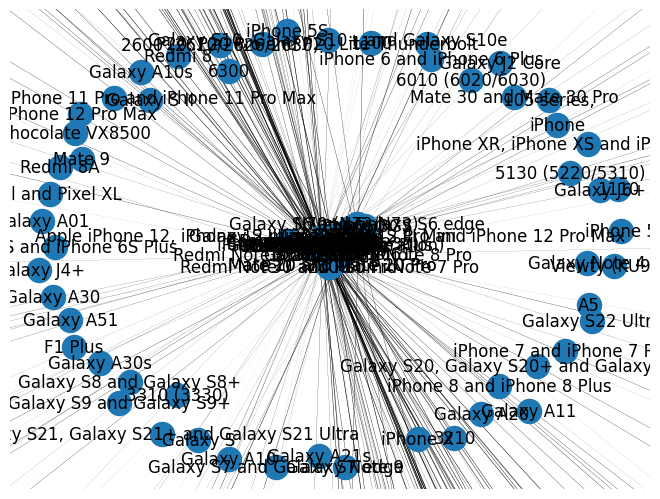

In [ ]:
# Create a graph for visualization
G_visualize = nx.Graph()

# Add nodes to the visualization graph
for brand in df['Model']:
    G_visualize.add_node(brand)

# Add predicted links as edges to the visualization graph
for link in link_prediction:
    brand1, brand2, score = link
    G_visualize.add_edge(brand1, brand2, weight=score)

# Draw the graph with edge thickness based on link scores
pos = nx.spring_layout(G_visualize)  # Layout for better visualization
nx.draw(G_visualize, pos, with_labels=True, width=[d['weight'] for (u, v, d) in G_visualize.edges(data=True)])
plt.show()


# V. Statistical Inference


### A. Hypthoses

<p align="justify">In our study, we investigate the relationship between the market share of a smartphone brand and its year of release. The hypotheses we propose are as follows:</p>

**Null Hypothesis (H0)**: There is no significant correlation between the market share of a smartphone brand and its year of release.

**Alternative Hypothesis (H1)**: There is a significant correlation between the market share of a smartphone brand and its year of release.

### B. Hypothesis Testing

<p align="justify">To test these hypotheses, Pearson's correlation coefficient (r) can be used as the statistical test. This test measures the strength and direction of the linear relationship between two variables.</p>

<p align="justify">Performing a Shapiro-Wilk test before conducting Pearson's correlation test should be done in statistical analysis since this test assesses the normality of the data distribution, which is an assumption for Pearson's correlation test. If the data is not normally distributed, we can transform our data using mathematical transformations. These transformations can make the data more normally distributed, which can improve the validity of Pearson's correlation test.</p>

<p align="justify">In this code, we import the necessary packages in order to perform Shapiro-Wilk test and Pearson's correlation test</p>



In [ ]:
from scipy.stats import shapiro
from scipy.stats import pearsonr

### C. Assumptions and Pre-processing



<p align="justify">The code below performs a Shapiro-Wilk test to assess the normality of the 'Graph (million units)' data from a dataset. The Shapiro-Wilk test statistic and p-value are calculated using shapiro(data['Graph (million units)']), and these results are printed to the console. The code then interprets the Shapiro-Wilk test results by comparing the obtained p-value to a significance level (alpha_shapiro = 0.05) and prints whether the data is considered normally distributed or not based on this comparison.</p>

In [ ]:
# Perform Shapiro-Wilk test for normality
shapiro_test_stat, shapiro_p_value = shapiro(data['Graph (million units)'])

# Print Shapiro-Wilk test results
print("Shapiro-Wilk Test Statistic:", shapiro_test_stat)
print("Shapiro-Wilk Test p-value:", shapiro_p_value)

# Interpret Shapiro-Wilk test results
alpha_shapiro = 0.05
if shapiro_p_value < alpha_shapiro:
    print("Shapiro-Wilk Test: Data is not normally distributed.")
else:
    print("Shapiro-Wilk Test: Data is normally distributed.")

Shapiro-Wilk Test Statistic: 0.7504191398620605
Shapiro-Wilk Test p-value: 1.0695010415479045e-12
Shapiro-Wilk Test: Data is not normally distributed.


<p align="justify">Next, the code creates a histogram of the 'Graph (million units)' data using Matplotlib. The histogram visualizes the distribution of the data, with the x-axis representing the 'Graph (million units)' values, the y-axis showing the frequency of occurrence, and the title indicating the purpose of the plot. This histogram provides a graphical representation of the data distribution, complementing the statistical analysis performed with the Shapiro-Wilk test.</p>

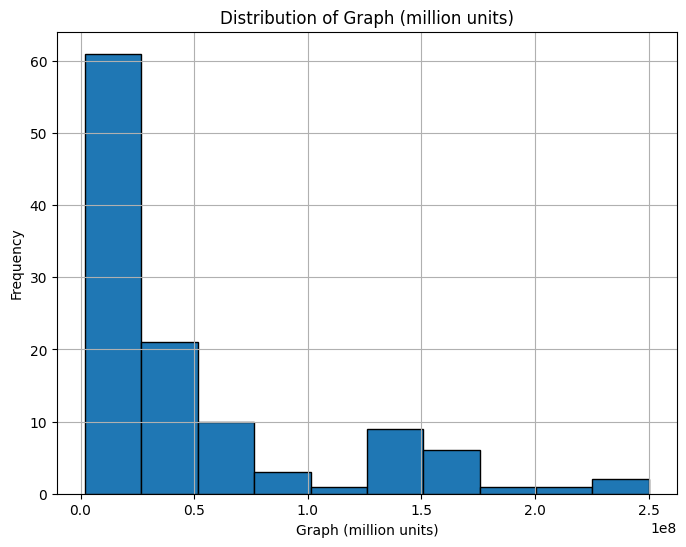

In [ ]:
# Create a histogram of the 'Graph (million units)' data
plt.figure(figsize=(8, 6))
plt.hist(data['Graph (million units)'], bins=10, edgecolor='black')
plt.xlabel('Graph (million units)')
plt.ylabel('Frequency')
plt.title('Distribution of Graph (million units)')
plt.grid(True)
plt.show()

<p align="justify">Based on the results from the values and bar graph displayed by Shapiro-Wilk test, we now know that the data is not normally distributed. As mentioned in the Hypothesis Testing, we will perform transformation of our data using mathematical transformations.</p>

### D. Perform Pearson's Correlation Test



<p align="justify">Since the data is not normally distributed, the code below transforms the 'Year' column using a logarithmic transformation (np.log(x)), applies the transformation to create transformed_data, and then calculates Pearson's correlation coefficient using the transformed data. Moreover, the significance level (alpha) is set at 0.05.</p>


In [ ]:
# Transform the data using a logarithmic transformation
transformed_data = data['Year'].apply(lambda x: np.log(x))

# Calculate Pearson's correlation coefficient
corr_coeff, p_value = pearsonr(transformed_data, data['Graph (million units)'])

alpha = 0.05

### E. Interpret Results

<p align="justify">The code below displays if the p-value is less than the significance level (e.g., p < 0.05), reject the null hypothesis and conclude that there is a significant correlation between market share and year of release. On the other hand, if the p-value is greater than the significance level, fail to reject the null hypothesis, indicating insufficient evidence to conclude a significant correlation.</p>

<p align="justify">After, the correlation coefficient and p-value are printed to the console, indicating the strength and significance of the correlation.</p>

<p align="justify">Finally, based on the p-value and the chosen significance level, the code displays whether to reject the null hypothesis (significant correlation) or fail to reject it (insufficient evidence for a significant correlation).</p>

In [ ]:
print("Correlation Coefficient:", corr_coeff)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant correlation between market share and year of release.")
else:
    print("Fail to Reject Null Hypothesis: Insufficient evidence to conclude a significant correlation.")

Correlation Coefficient: -0.26703578905713127
P-value: 0.003914914634392784
Reject Null Hypothesis: There is a significant correlation between market share and year of release.


### F. Report Findings

<p align="justify">The analysis of the data reveals a statistically significant correlation between the market share of a smartphone brand and the year of its release. The correlation coefficient, calculated at approximately -0.267, indicates a negative correlation between these variables. This finding suggests that as the year of release increases, the market share of the smartphone brand tends to decrease. The statistical significance is supported by a p-value of 0.0039, which is below the chosen significance level of 0.05. Therefore, we reject the null hypothesis, concluding that there is indeed a significant relationship between the market share of a smartphone brand and its year of release.</p>

# VI. Insights and Conclusions

<p align="justify">Based on the initial observations made by the researchers in Phase 1 of the project, there is no certainty regarding the existence of a relationship between the sales of released smartphone models and the market share of their brands. The data modeling conducted through Clustering also suggests that while there are similarities between the variables, it is not safe to conclude that there is a correlation between them. However, this claim was challenged by the Silhouette Score and Link Prediction, as the similarities between market share and year of release identified in the Clustering Analysis may be predicted to be linked in the future gaining possible connections.</p>

<p align="justify">To further prove this point, the most appropriate statistical inference test to conduct would be the Shapiro-Wilk Test and Pearson's Correlation Test. To conduct the test, the researchers formed their null and alternative hypotheses. To verify the validity of the hypotheses, a Shapiro-Wilk test has been conducted which reveals that the test statistic is close to the p-value. This makes the dataset not normally distributed and thus further steps must be taken before the actual test could be conducted. Because of this, the researchers made the data undergo a logarithmic transformation in order to normalize the dataset. Afterwards, it is observed that the p-value of the data is lower than the chosen significance level after the Pearson's Correlation Test, indicating the existence of a relationship between the two variables. However, it is also observed that the value of the correlation is negative, indicating an inverse relationship between the sales and market share. With these results in mind, the researchers rejected the null hypothesis.</p>